For this assignment, at least one question that you choose to answer should look at the data in different unit of analysis than is present in the data file.  For example, instead of looking at individual donors, you could look at the donors of each of the 9 income or wealth types.

Simplest example question (you should do one more complex than this):
For each wealth type, what is the average home values of all the donors of that type?


Unit of analysis: wealth types
Comparison: for each wealth type, compute the average home values of the neighborhoods of all the donors of that type
Output: should be in a file with 9 rows of data (you may also produce header and label rows), where each row has an income type (1-9) and the average home values

One way to increase the complexity of this particular question would be to add more items to be compared to the income types, i.e. add columns to the output with average total gifts or values of the last gifts.  Another way is to introduce a more detailed unit of analysis, for example, suppose that for each income level, you reported by gender, giving the average home values for both men and women in each category.

Other ideas:
Compare donors in the various zip codes with various types or amounts of giving.
Compare donors by the number of promotions with the total amount of donations and the frequency of donations.
Compare the number of months since the last donation to the donation amounts.

What to Submit:

In addition to the program that you write, you should write a small report.  In it you should describe:

Data and its source
Description of your data exploration and data cleaning steps
At least two clearly stated comparison questions with the unit of analysis, the comparison values and how they are computed
Brief description of the program
Description of the output files

For your program, you may use any of the code developed in class as a template, but it is absolutely essential that you use appropriate variable names and that you write original comments for what your program does.  Recall that good comments demonstrate your understanding of the code that you write and the problem that you are trying to solve.

Groupwo

In [1]:
#https://www.kaggle.com/jacobbaruch/nba-player-of-the-week

import pandas as pd
import numpy as np
import csv 


# split first middle last
#split team neame
#split date 
#remove column

In [13]:
bbfile = '/Users/kenmckee/Desktop/GS/F18/Scrpt/KMCKEE_HW1/NBA_player_of_the_week.csv'

#You may choose a dataset to work with.  
#As a guideline, datasets should be chosen that have somewhere between 500 and 4,000 lines of data 
#with some number of columns between 4 and 50.  
#These guidelines are not exact limits, just guidance for selecting data.



In [14]:
#You may choose a dataset to work with.  
#As a guideline, datasets should be chosen that have somewhere between 500 and 4,000 lines of data 
#with some number of columns between 4 and 50.  
#These guidelines are not exact limits, just guidance for selecting data.


bbdf = pd.read_csv(bbfile)

#print(bbdf)
bbdf.shape

(1145, 13)

Data and its source Description of your data exploration and data cleaning steps At least two clearly stated comparison questions with the unit of analysis, the comparison values and how they are computed Brief description of the program Description of the output files

In [15]:
#Display the raw data 


for column in bbdf:
    print(bbdf[column])


#bbdf.drop[Conference]

0       29
1       23
2       28
3       37
4       28
        ..
1140    28
1141    25
1142    27
1143    23
1144    28
Name: Age, Length: 1145, dtype: int64
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
1140    West
1141    East
1142    West
1143    East
1144    West
Name: Conference, Length: 1145, dtype: object
0       Apr 14, 1985
1        Apr 7, 1985
2        Apr 1, 1985
3       Mar 24, 1985
4       Mar 17, 1985
            ...     
1140     Nov 6, 2017
1141    Oct 30, 2017
1142    Oct 30, 2017
1143    Oct 23, 2017
1144    Oct 23, 2017
Name: Date, Length: 1145, dtype: object
0       1978
1       1982
2       1979
3       1969
4       1978
        ... 
1140    2009
1141    2013
1142    2010
1143    2013
1144    2009
Name: Draft Year, Length: 1145, dtype: int64
0         6-5
1         6-6
2         6-6
3         7-2
4         6-9
        ...  
1140    196cm
1141    193cm
1142    211cm
1143    211cm
1144    196cm
Name: Height, Length: 1145, dtype: obje

Find the distribution of the names and devise a strategy for splitting them 

In [16]:
bbdf.Player.unique()

array(['Micheal Ray Richardson', 'Derek Smith', 'Calvin Natt',
       'Kareem Abdul-Jabbar', 'Larry Bird', 'Darrell Griffith',
       'Sleepy Floyd', 'Mark Aguirre', 'Magic Johnson',
       'Dominique Wilkins', 'Tom McMillen', 'Michael Jordan',
       'World B. Free', 'Isiah Thomas', 'Terry Cummings',
       'Orlando Woolridge', 'Jack Sikma', 'Bernard King', 'Moses Malone',
       'Alex English', 'Larry Nance', 'Herb Williams', 'Charles Barkley',
       'Adrian Dantley', 'Sidney Moncrief', 'Clyde Drexler',
       'Alvin Robertson', 'Jeff Ruland', 'Patrick Ewing', 'Buck Williams',
       'Julius Erving', 'Larry Smith', 'Karl Malone', 'Fat Lever',
       'Otis Thorpe', 'Tom Chambers', 'Hot Rod Williams', 'Robert Parish',
       'Harold Pressley', 'Bobby Hansen', 'Roy Tarpley', 'John Stockton',
       'Byron Scott', 'Xavier McDaniel', 'Kevin Johnson', 'Chuck Person',
       'Hakeem Olajuwon', 'Ron Harper', 'Chris Mullin', 'Dale Ellis',
       'Michael Adams', 'David Robinson', 'Rony Seika

Data cleansing and data checking steps
In order to apply the intended algorithms it is desireable to split the player names into first and last name columms 
and split the team name into city and team name. 

Two different styles of parsing were used to demonstrate techniques. It turned out that the teqnique for splitting the team 
from the city would have worked for both Team and Player columns. 



In [17]:
bbdf['Last-Name'] = bbdf['Player'].str.rsplit(' ',1).str[1]
bbdf['First-Name'] = bbdf['Player'].str.rsplit(' ',1).str[0]
bbdf

,Age,Conference,Date,Draft Year,Height,Player,Position,Season,Season short,Seasons in league,Team,Weight,Real_value,Last-Name,First-Name
0,29,NaN,"Apr 14, 1985",1978,6-5,Micheal Ray Richardson,PG,1984-1985,1985,6,New Jersey Nets,189,1.0,Richardson,Micheal Ray
1,23,NaN,"Apr 7, 1985",1982,6-6,Derek Smith,SG,1984-1985,1985,2,Los Angeles Clippers,205,1.0,Smith,Derek
2,28,NaN,"Apr 1, 1985",1979,6-6,Calvin Natt,F,1984-1985,1985,5,Denver Nuggets,220,1.0,Natt,Calvin
3,37,NaN,"Mar 24, 1985",1969,7-2,Kareem Abdul-Jabbar,C,1984-1985,1985,15,Los Angeles Lakers,225,1.0,Abdul-Jabbar,Kareem
4,28,NaN,"Mar 17, 1985",1978,6-9,Larry Bird,SF,1984-1985,1985,5,Boston Celtics,220,1.0,Bird,Larry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140,28,West,"Nov 6, 2017",2009,196cm,James Harden,SG,2017-2018,2018,8,Houston Rockets,100kg,0.5,Harden,James
1141,25,East,"Oct 30, 2017",2013,193cm,Victor Oladipo,G,2017-2018,2018,4,Indiana Pacers,95kg,0.5,Oladipo,Victor
1142,27,West,"Oct 30, 2017",2010,211cm,DeMarcus Cousins,C,2017-2018,2018,7,New Orleans Pelicans,122kg,0.5,Cousins,DeMarcus
1143,23,East,"Oct 23, 2017",2013,211cm,Giannis Antetokounmpo,F,2017-2018,2018,4,Milwaukee Bucks,101kg,0.5,Antetokounmpo,Giannis


In [18]:
#s.rsplit(";", 3)

bbdf['TeamName'] = bbdf['Team'].str.rsplit(' ',1).str[1]
bbdf['City'] = bbdf['Team'].str.rsplit(' ',1).str[0]
bbdf

,Age,Conference,Date,Draft Year,Height,Player,Position,Season,Season short,Seasons in league,Team,Weight,Real_value,Last-Name,First-Name,TeamName,City
0,29,NaN,"Apr 14, 1985",1978,6-5,Micheal Ray Richardson,PG,1984-1985,1985,6,New Jersey Nets,189,1.0,Richardson,Micheal Ray,Nets,New Jersey
1,23,NaN,"Apr 7, 1985",1982,6-6,Derek Smith,SG,1984-1985,1985,2,Los Angeles Clippers,205,1.0,Smith,Derek,Clippers,Los Angeles
2,28,NaN,"Apr 1, 1985",1979,6-6,Calvin Natt,F,1984-1985,1985,5,Denver Nuggets,220,1.0,Natt,Calvin,Nuggets,Denver
3,37,NaN,"Mar 24, 1985",1969,7-2,Kareem Abdul-Jabbar,C,1984-1985,1985,15,Los Angeles Lakers,225,1.0,Abdul-Jabbar,Kareem,Lakers,Los Angeles
4,28,NaN,"Mar 17, 1985",1978,6-9,Larry Bird,SF,1984-1985,1985,5,Boston Celtics,220,1.0,Bird,Larry,Celtics,Boston
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140,28,West,"Nov 6, 2017",2009,196cm,James Harden,SG,2017-2018,2018,8,Houston Rockets,100kg,0.5,Harden,James,Rockets,Houston
1141,25,East,"Oct 30, 2017",2013,193cm,Victor Oladipo,G,2017-2018,2018,4,Indiana Pacers,95kg,0.5,Oladipo,Victor,Pacers,Indiana
1142,27,West,"Oct 30, 2017",2010,211cm,DeMarcus Cousins,C,2017-2018,2018,7,New Orleans Pelicans,122kg,0.5,Cousins,DeMarcus,Pelicans,New Orleans
1143,23,East,"Oct 23, 2017",2013,211cm,Giannis Antetokounmpo,F,2017-2018,2018,4,Milwaukee Bucks,101kg,0.5,Antetokounmpo,Giannis,Bucks,Milwaukee


In [8]:
bbdf.Conference.unique()

bbdf.isnull().sum()



Age                    0
Conference           384
Date                   0
Draft Year             0
Height                 0
Player                 0
Position               0
Season                 0
Season short           0
Seasons in league      0
Team                   0
Weight                 0
Real_value             0
Last-Name              0
First-Name             0
TeamName               0
City                   0
dtype: int64

In [9]:
bbdfn = bbdf[bbdf['Conference'].isnull()]
bbdfnt = bbdfn.TeamName.unique()

print(bbdfnt)

for t in bbdfnt:
    c = bbdf.loc[bbdf['TeamName'] == t, 'Conference']
    print(t,c)
    


['Nets' 'Clippers' 'Nuggets' 'Lakers' 'Celtics' 'Jazz' 'Warriors'
 'Mavericks' 'Hawks' 'Bullets' 'Bulls' 'Cavaliers' 'Pistons' 'Bucks'
 'SuperSonics' 'Knicks' 'Sixers' 'Suns' 'Pacers' 'Blazers' 'Spurs' 'Kings'
 'Rockets' 'Heat' 'Magic' 'Hornets' 'Timberwolves' 'Raptors']
Nets 0        NaN
14       NaN
44       NaN
163      NaN
190      NaN
203      NaN
219      NaN
263      NaN
302      NaN
312      NaN
381      NaN
388     East
400     East
410     East
430     East
432     East
457     East
459     East
477     East
491     East
493     East
503     East
521     East
523     East
541     East
555     East
597     East
621     East
627     East
717     East
741     East
927     East
969     East
971     East
1007    East
1035    East
Name: Conference, dtype: object
Clippers 1        NaN
16       NaN
45       NaN
128      NaN
168      NaN
218      NaN
284      NaN
417     West
502     West
516     West
588     West
602     West
608     West
776     East
794     West
850     West
906   

In [10]:
print(bbdfn.loc[[379]])

     Age Conference          Date  Draft Year Height       Player Position  \
379   21        NaN  Nov 26, 2000        1999    6-3  Baron Davis        G   

        Season  Season short  Seasons in league               Team Weight  \
379  2000-2001          2001                  1  Charlotte Hornets    215   

     Real_value Last-Name First-Name TeamName       City  
379         1.0     Davis      Baron  Hornets  Charlotte  


In [11]:
WEST = ('Clippers','Nuggets','Lakers','Jazz','Warriors','Mavericks','Supersonics','Suns','Blazers','Spurs','Kings','Rockets','Timberwolves',)
EAST = ('Nets','Celtics','Hawks','Bullets','Bulls','Cavaliers','Pistions','Bucks','Knicks','Sixers','Pacers','Heat','Magic','Raptors', 'Hornets')

In [12]:
bbdf['Conference'] = np.where(bbdf.TeamName.isin(['Nets','Celtics','Hawks','Bullets','Bulls','Cavaliers','Pistions','Bucks','Knicks','Sixers','Pacers','Heat','Magic','Raptors', 'Hornets','Pistons']),'East', bbdf['Conference'])
print(bbdf)


      Age Conference          Date  Draft Year Height                  Player  \
0      29       East  Apr 14, 1985        1978    6-5  Micheal Ray Richardson   
1      23        NaN   Apr 7, 1985        1982    6-6             Derek Smith   
2      28        NaN   Apr 1, 1985        1979    6-6             Calvin Natt   
3      37        NaN  Mar 24, 1985        1969    7-2     Kareem Abdul-Jabbar   
4      28       East  Mar 17, 1985        1978    6-9              Larry Bird   
5      26        NaN  Mar 10, 1985        1980    6-4        Darrell Griffith   
6      24        NaN   Mar 3, 1985        1982    6-3            Sleepy Floyd   
7      25        NaN  Feb 24, 1985        1981    6-6            Mark Aguirre   
8      25        NaN  Feb 17, 1985        1979    6-9           Magic Johnson   
9      25       East   Feb 3, 1985        1982    6-7       Dominique Wilkins   
10     32       East  Jan 27, 1985        1974   6-11            Tom McMillen   
11     22       East  Jan 20

In [13]:
bbdf['Conference'] = np.where(bbdf.TeamName.isin(['Clippers','Nuggets','Lakers','Jazz','Warriors','Mavericks','SuperSonics','Suns','Blazers','Spurs','Kings','Rockets','Timberwolves']),'West', bbdf['Conference'])
print(bbdf)

      Age Conference          Date  Draft Year Height                  Player  \
0      29       East  Apr 14, 1985        1978    6-5  Micheal Ray Richardson   
1      23       West   Apr 7, 1985        1982    6-6             Derek Smith   
2      28       West   Apr 1, 1985        1979    6-6             Calvin Natt   
3      37       West  Mar 24, 1985        1969    7-2     Kareem Abdul-Jabbar   
4      28       East  Mar 17, 1985        1978    6-9              Larry Bird   
5      26       West  Mar 10, 1985        1980    6-4        Darrell Griffith   
6      24       West   Mar 3, 1985        1982    6-3            Sleepy Floyd   
7      25       West  Feb 24, 1985        1981    6-6            Mark Aguirre   
8      25       West  Feb 17, 1985        1979    6-9           Magic Johnson   
9      25       East   Feb 3, 1985        1982    6-7       Dominique Wilkins   
10     32       East  Jan 27, 1985        1974   6-11            Tom McMillen   
11     22       East  Jan 20

In [14]:
bbdfn = bbdf[bbdf['Conference'].isnull()]
bbdfnt = bbdfn.TeamName.unique()

print(bbdfnt)

for t in bbdfnt:
    c = bbdf.loc[bbdf['TeamName'] == t, 'Conference']
    print(t,c)

[]


In [15]:
bbdf[['w','wtype']] = bbdf['Weight'].str.split('kg', expand=True)
print (bbdf)

      Age Conference          Date  Draft Year Height                  Player  \
0      29       East  Apr 14, 1985        1978    6-5  Micheal Ray Richardson   
1      23       West   Apr 7, 1985        1982    6-6             Derek Smith   
2      28       West   Apr 1, 1985        1979    6-6             Calvin Natt   
3      37       West  Mar 24, 1985        1969    7-2     Kareem Abdul-Jabbar   
4      28       East  Mar 17, 1985        1978    6-9              Larry Bird   
5      26       West  Mar 10, 1985        1980    6-4        Darrell Griffith   
6      24       West   Mar 3, 1985        1982    6-3            Sleepy Floyd   
7      25       West  Feb 24, 1985        1981    6-6            Mark Aguirre   
8      25       West  Feb 17, 1985        1979    6-9           Magic Johnson   
9      25       East   Feb 3, 1985        1982    6-7       Dominique Wilkins   
10     32       East  Jan 27, 1985        1974   6-11            Tom McMillen   
11     22       East  Jan 20

In [16]:
#print(bbdf['w'])
bbdf['w'] = bbdf['w'].apply(pd.to_numeric, errors='coerce')

In [17]:
bbdf['w'].loc[bbdf['wtype'].notnull()]

1055    100
1056     91
1057    105
1058     86
1059    100
1060    100
1061    120
1062     88
1063     95
1064    111
1065     83
1066    104
1067    113
1068    114
1069     84
1070     86
1071    100
1072    122
1073    113
1074    104
1075    100
1076    102
1077    105
1078     86
1079     95
1080    100
1081     84
1082     91
1083    100
1084    100
       ... 
1115    106
1116     86
1117    113
1118     88
1119     86
1120     79
1121    100
1122     86
1123     94
1124     79
1125    100
1126     91
1127    113
1128     79
1129     95
1130    109
1131    113
1132    100
1133     86
1134    115
1135    100
1136    111
1137    107
1138    113
1139    109
1140    100
1141     95
1142    122
1143    101
1144    100
Name: w, Length: 90, dtype: int64

In [18]:
bbdf.w[bbdf['wtype'].notnull()] = (bbdf['w']*2.20462)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
bbdf.w = bbdf.w.round()

In [20]:
print("min ", bbdf['w'].min())
print("max ", bbdf['w'].max())
print("median ",bbdf['w'].median())
print("mode ",bbdf['w'].mode())
print("stddev ", bbdf['w'].std())

print("")

print("min ", bbdf['Age'].min())
print("max ", bbdf['Age'].max())
print("median ",bbdf['Age'].median())
print("mode ",bbdf['Age'].mode())
print("stddev ", bbdf['Age'].std())

min  150.0
max  325.0
median  225.0
mode  0    250.0
dtype: float64
stddev  31.57742424855174

min  19
max  40
median  26.0
mode  0    25
dtype: int64
stddev  3.4023542726701725


In [21]:
ahist = bbdf.hist(column='w')



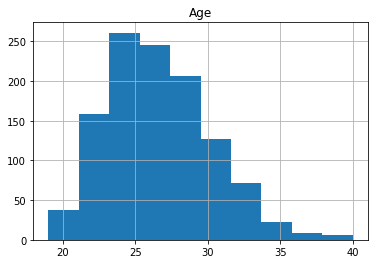

In [22]:
ahist = bbdf.hist(column='Age')

In [23]:
#find the team with the most players in the population

from matplotlib import pyplot as plot
import numpy as np
pcounts = bbdf['TeamName'].value_counts()



print(pcounts)



Lakers          71
Spurs           61
Cavaliers       59
Heat            57
Rockets         56
Jazz            47
Suns            45
Bulls           44
Warriors        44
Magic           44
Celtics         43
Thunder         41
Nuggets         41
Sixers          37
Knicks          36
Nets            36
Blazers         33
Hawks           32
Raptors         31
Mavericks       30
Pistons         29
Clippers        27
Hornets         27
Bucks           26
Timberwolves    26
Kings           23
Wizards         23
Pacers          23
SuperSonics     20
Bobcats         11
Grizzlies        9
Bullets          8
Pelicans         5
Name: TeamName, dtype: int64


In [24]:
pocounts = bbdf['Position'].value_counts()
print(pocounts)

G      178
SG     164
C      158
PF     139
F      125
PG     120
SF     119
FC      83
GF      47
F-C      9
G-F      3
Name: Position, dtype: int64


In [25]:
from matplotlib import pyplot as plot
import numpy as np
pcounts = bbdf['Last-Name'].value_counts()



print(pcounts)

James           62
Bryant          33
Johnson         28
Malone          26
Durant          26
Jordan          25
Iverson         23
Duncan          23
O'Neal          22
Howard          21
Robinson        21
Garnett         20
Wade            19
Anthony         18
Pierce          18
Harden          18
Kidd            17
Westbrook       17
Nowitzki        16
Williams        14
Paul            13
McGrady         12
Olajuwon        12
Curry           12
Ewing           12
Barkley         11
Wallace         11
Carter          11
Drexler         11
Aldridge        10
                ..
Magloire         1
Gatling          1
Perry            1
Abdul-Jabbar     1
Vaught           1
McMillen         1
Houston          1
Faried           1
Sabonis          1
Rodman           1
Lin              1
West             1
Ellison          1
Ford             1
Hughes           1
Ilgauskas        1
Blaylock         1
Beal             1
Stackhouse       1
Sikma            1
Barea            1
Free        

In [26]:
print(ahist)

[[<matplotlib.axes._subplots.AxesSubplot object at 0x1178dbdd8>]]


In [27]:
bbdf.shape

(1145, 19)

In [28]:
bbdf.dtypes

Age                    int64
Conference            object
Date                  object
Draft Year             int64
Height                object
Player                object
Position              object
Season                object
Season short           int64
Seasons in league      int64
Team                  object
Weight                object
Real_value           float64
Last-Name             object
First-Name            object
TeamName              object
City                  object
w                    float64
wtype                 object
dtype: object